# Exercise 5.9

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as la
from IPython.display import display, Math
from matplotlib.patches import Ellipse
from scipy import stats

In [2]:
n, p = 61, 6
alpha = 0.05

xbar = np.array([[95.52], [164.38], [55.69], [93.39], [17.98], [31.13]])

S = np.array([
    [3266.46, 1343.97, 731.54, 1175.50, 162.68, 238.37],
    [1343.97, 721.91 , 324.25, 537.35 , 80.17 , 117.73],
    [731.54 , 324.25 , 179.28, 281.17 , 39.15 , 56.80],
    [1175.50, 537.35 , 281.17, 474.98 , 63.73 , 94.85],
    [162.68 , 80.17  , 39.15 , 63.73  , 9.95  , 13.88],
    [238.37 , 117.73 , 56.80 , 94.85  , 13.88 , 21.26]],)

## (a)

In [3]:
chi2_upper = stats.chi2.ppf(1-alpha, p)
S_var = np.diag(S).reshape(p,1)
simul_ci = xbar + np.sqrt(chi2_upper) * np.sqrt(S_var / n) * np.array([-1, 1])

In [4]:
for i in range(simul_ci.shape[0]):
    display(Math(fr'{xbar[i,0]} \pm \sqrt{{{chi2_upper:.2f}}} \frac{{\sqrt{{{S[i,i]}}}}}{{\sqrt{{{n}}}}}\hspace{{0.5cm}} \text{{contains}}'\
                     fr'\hspace{{0.5cm}}\mu_{i+1}\hspace{{1cm}}\text{{or}}\hspace{{1cm}}{simul_ci[i,0]:.2f} \leq \mu_{i+1} \leq {simul_ci[i,1]:.2f}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## (b)

In [5]:
def plot_large_sample_simult_ellipse_with_S(S: np.ndarray, xbar: np.ndarray, p: int, alpha: float):
    eigenvalues, eigenvectors = la.eigh(S)
    max_idx, min_idx = np.argmax(eigenvalues), np.argmin(eigenvalues)
    lmbda1, lmbda2 = eigenvalues[max_idx], eigenvalues[min_idx]
    e1, e2 = eigenvectors[:, max_idx].copy(), eigenvectors[:, min_idx].copy()

    chi2_val = stats.chi2(df=p).ppf(1 - alpha)

    ell_width = np.sqrt(lmbda1)*np.sqrt(chi2_val/n)
    ell_height = np.sqrt(lmbda2)*np.sqrt(chi2_val/n)
    ell_angle = np.degrees(np.arctan2(e1[1], e1[0]))

    plt.figure()
    ax = plt.gca()
    ellipse = Ellipse(xy=xbar,
                      width=2*ell_width,
                      height=2*ell_height,
                      angle=ell_angle,
                      fill=False)
    ax.add_patch(ellipse)
    for i in [-1, 1]:
        plt.quiver(xbar[0],
                xbar[1],
                e1[0] * ell_width * i,
                e1[1] * ell_width * i,
                angles='xy',
                scale_units='xy',
                scale=1
                )
        plt.quiver(xbar[0],
                xbar[1],
                e2[0] * ell_height * i,
                e2[1] * ell_height * i,
                angles='xy',
                scale_units='xy',
                scale=1)
    return plt, ax

In [6]:
# Subset elements of S related to grizzly weight (0) and girth (3).
idx_wgt_girth = [0,3]
S_wgt_girth = S[np.ix_(idx_wgt_girth, idx_wgt_girth)]
xbar_wgt_girth = xbar[idx_wgt_girth]

In [7]:
S_wgt_girth

array([[3266.46, 1175.5 ],
       [1175.5 ,  474.98]])

In [8]:
xbar_wgt_girth

array([[95.52],
       [93.39]])

In [9]:
la.eigh(S_wgt_girth)

(array([  45.92127203, 3695.51872797]),
 array([[ 0.34287505, -0.93938102],
        [-0.93938102, -0.34287505]]))

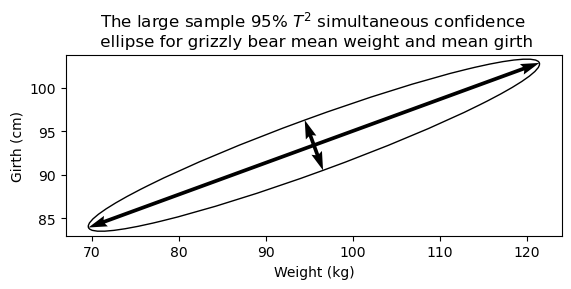

In [10]:
my_plot, ax = plot_large_sample_simult_ellipse_with_S(
    S_wgt_girth, xbar_wgt_girth, p, alpha)
ax.set_aspect('equal')
ax.set_title('The large sample 95% $T^{2}$ simultaneous confidence \n ellipse for grizzly bear mean weight and mean girth')
my_plot.xlabel('Weight (kg)')
my_plot.ylabel('Girth (cm)')
my_plot.savefig('Question-5-9-b.png')
my_plot.show()

## (c)

In [11]:
m = p
# This time use z(\alpha/(2m)) as the reference distribution.
z = stats.norm.ppf(1-(alpha/(2*m)))
bonfer_ci = xbar + z * np.sqrt(S_var / n) * np.array([-1, 1])

In [12]:
for i in range(simul_ci.shape[0]):
    display(Math(fr'{xbar[i,0]} \pm {z:.2f} \frac{{\sqrt{{{S[i,i]}}}}}{{\sqrt{{{n}}}}}\hspace{{0.5cm}} \text{{contains}}'\
                     fr'\hspace{{0.5cm}}\mu_{i+1}\hspace{{1cm}}\text{{or}}\hspace{{1cm}}{bonfer_ci[i,0]:.2f} \leq \mu_{i+1} \leq {bonfer_ci[i,1]:.2f}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## (d)

In [13]:
# Subset the grizzly weight index (0), and the girth index (3).
idx_wgt_girth = [0, 3]
bonfer_ci = bonfer_ci[idx_wgt_girth]
simul_ci = simul_ci[idx_wgt_girth]

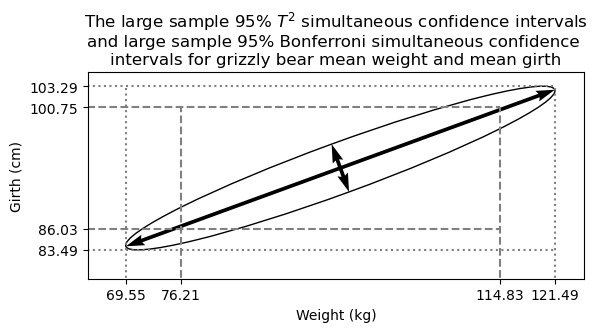

In [14]:
my_plot, ax = plot_large_sample_simult_ellipse_with_S(
    S_wgt_girth, xbar_wgt_girth, p, alpha)
ax.set_title('The large sample 95% $T^{2}$ simultaneous confidence intervals \n'\
             'and large sample 95% Bonferroni simultaneous confidence \n'\
             'intervals for grizzly bear mean weight and mean girth')

bonfer_ci
# Draw dashed lines at the simultaneous T^2 values (closed).
ax.plot([simul_ci[0,0], simul_ci[0,0]], [0, simul_ci[1,1]], linestyle=':', color='gray', label='$T^{2}$')
ax.plot([simul_ci[0,1], simul_ci[0,1]], [0, simul_ci[1,1]], linestyle=':', color='gray')

# Draw dashed lines at the simultaneous T^2 values (open).
ax.plot([0, simul_ci[0,1]], [simul_ci[1,1], simul_ci[1,1]], linestyle=':', color='gray')
ax.plot([0, simul_ci[0,1]], [simul_ci[1,0], simul_ci[1,0]], linestyle=':', color='gray')

# Draw dashed lines at the simultaneous T^2 values (closed).
ax.plot([bonfer_ci[0,0], bonfer_ci[0,0]], [0, bonfer_ci[1,1]], linestyle='--', color='gray', label='$Bonferroni$')
ax.plot([bonfer_ci[0,1], bonfer_ci[0,1]], [0, bonfer_ci[1,1]], linestyle='--', color='gray')

# Draw dashed lines at the simultaneous T^2 values (open).
ax.plot([0, bonfer_ci[0,1]], [bonfer_ci[1,1], bonfer_ci[1,1]], linestyle='--', color='gray')
ax.plot([0, bonfer_ci[0,1]], [bonfer_ci[1,0], bonfer_ci[1,0]], linestyle='--', color='gray')

# Label simultaneous CI on the axis.
ax.set_xticks(np.append(simul_ci[0,:], bonfer_ci[0, :], axis=0))
ax.set_yticks(np.append(simul_ci[1,:], bonfer_ci[1, :], axis=0))
# ax.legend()

my_plot.xlabel('Weight (kg)')
my_plot.ylabel('Girth (cm)')
ax.set_xlim(65,125)
ax.set_ylim(80,105)
ax.set_aspect('equal')

my_plot.savefig('Question-5-9-d.png')
my_plot.show()

## (e)

In [15]:
a = np.array([[0],[0],[0],[0],[-1],[1]])
z = stats.norm.ppf(1-(0.05/(2*(p + 1))))

In [16]:
bonf_diff_ci = (a.T @ xbar) + np.array([-1, 1]) *  z * np.sqrt((a.T @ S @ a) / n)
bonf_diff_ci = bonf_diff_ci.squeeze()

In [17]:
display(Math(fr'{(a.T @ xbar).squeeze():.2f} \pm {z:.2f} \frac{{\sqrt{{{(a.T @ S @ a).squeeze():.2f}}}}}{{\sqrt{{{n}}}}}\hspace{{0.5cm}} \text{{contains}}'\
                     fr'\hspace{{0.5cm}}\mu_{{6}} - \mu_{{5}}\hspace{{1cm}}\text{{or}}\hspace{{1cm}}{bonf_diff_ci[0]:.2f} \leq \mu_{{6}} - \mu_{{5}} \leq {bonf_diff_ci[1]:.2f}'))

<IPython.core.display.Math object>